# Imports Necessary Modules

In [259]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ft2font
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load Mask R-CNN Model and Initialize Random Colors

In [393]:
# Loading Mask RCNN
net = cv2.dnn.readNetFromTensorflow("dnn/frozen_inference_graph_coco.pb",
                                    "dnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt")

# Generate random colors
colors = np.random.randint(0, 255, (100, 3))

print(colors[:5])

[[133 175 106]
 [ 24 233 174]
 [ 97 115  46]
 [ 10 110 220]
 [ 48  26  55]]


# Load Image and Initialize Black Image

In [394]:
# Load image
img = cv2.imread("Images/forest.jpg")
height, width, _ = img.shape

# Create black image
black_image = np.zeros((height, width, 3), np.uint8)
black_image[:] = (100, 100, 0)

# Object Detection and Instance Segmentation with Mask R-CNN

In [395]:
# Detect objects
blob = cv2.dnn.blobFromImage(img, swapRB=True)
net.setInput(blob)

boxes, masks = net.forward(["detection_out_final", "detection_masks"])
detection_count = boxes.shape[2]
objects=[]
for i in range(detection_count):
    box = boxes[0, 0, i]
    class_id = box[1]
    score = box[2]
    if score < 0.5:
        continue

    # Get box Coordinates
    x = int(box[3] * width)
    y = int(box[4] * height)
    x2 = int(box[5] * width)
    y2 = int(box[6] * height)

    roi = black_image[y: y2, x: x2]
    roi_height, roi_width, _ = roi.shape

    # Get the mask
    mask = masks[i, int(class_id)]
    mask = cv2.resize(mask, (roi_width, roi_height))
    _, mask = cv2.threshold(mask, 0.5, 255, cv2.THRESH_BINARY)

    cv2.rectangle(img, (x, y), (x2, y2), (255, 0, 0), 3)

    # Get mask coordinates
    contours, _ = cv2.findContours(np.array(mask, np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    color = colors[int(class_id)]
    objects.append(class_id)
    for cnt in contours:
        cv2.fillPoly(roi, [cnt], (int(color[0]), int(color[1]), int(color[2])))
        '''cv2.imshow("roi", roi)
        cv2.waitKey(0)'''
print(np.unique(objects))

[21.]


# Displaying Results - Part 1

In [396]:
cv2.imshow("Image", img)
cv2.imshow("Black image", black_image)
cv2.waitKey(0)

-1

# Object Classification with MobileNetV2

In [397]:
# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

def classify_objects(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make predictions
    predictions = model.predict(img_array)

    # Decode and print predictions
    decoded_predictions = decode_predictions(predictions)
    for i in decoded_predictions:
        for j in i:
            print(j)

# Example Usage of Object Classification

In [398]:
# Example usage
img_path = 'images/forest.jpg'
classify_objects(img_path)

1/1 [==============================] - 1s 723ms/step
('n02504458', 'African_elephant', 0.6150692)
('n01871265', 'tusker', 0.0822944)
('n02504013', 'Indian_elephant', 0.054393463)
('n02410509', 'bison', 0.015778502)
('n02437312', 'Arabian_camel', 0.002371995)


# Advanced Image Detection 

In [417]:
#importing and using necessary files
config_file='Requirements/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='Requirements/frozen_inference_graph.pb'

#Tenserflow object detection model
model = cv2.dnn_DetectionModel(frozen_model,config_file)


# Reading datasets

In [418]:
classLabels=[]
filename='Requirements/yolov3.txt'
with open(filename,'rt') as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')

print("Number of Classes")
print(len(classLabels))
print("Class labels")
print(classLabels)

Number of Classes
81
Class labels
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'elephant', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'lion', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# Model training

In [419]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000021A7E0A1650>

# reading image

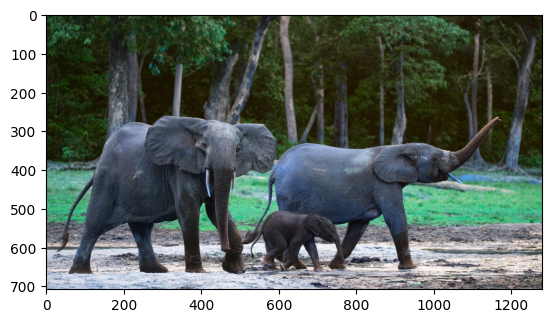

In [420]:
img = cv2.imread('images/forest.jpg')
plt.imshow(img)

# converting image from BGR to RGB

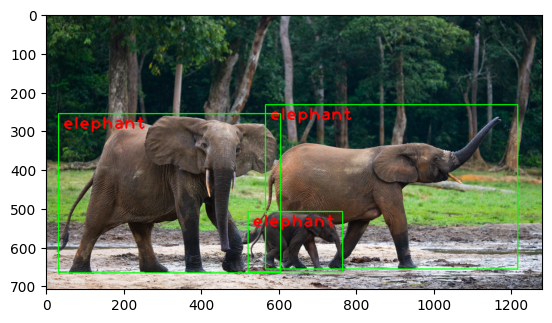

In [430]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# object detection

In [422]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

# fetching accuracy

In [423]:
print(confidence)

[0.8885065  0.85911566 0.72266394]


# fetching object index

In [431]:
print(ClassIndex)

[22 22 22]


# fetching coordinates of boxes

In [425]:
print(bbox)

[[566 233 652 424]
 [ 32 256 574 411]
 [521 508 245 156]]


# plotting boxes

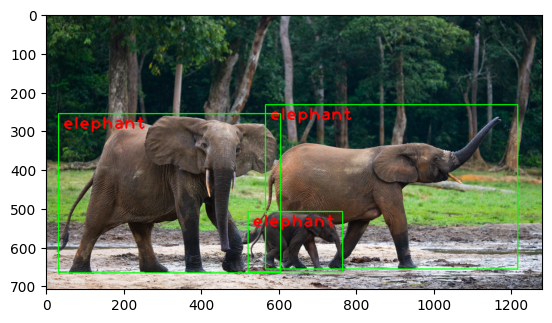

In [426]:

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (0, 255, 0),2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 0, 255), thickness=3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [429]:
cv2.imshow("Image", img)
cv2.waitKey(0)

-1